參考：https://www.kaggle.com/kenjee/titanic-project-example

Overview

1.透過圖表了解Data的型態

2.資料清理

3.探索性資料分析

4.特徵工程

5.模型建立

6.模型調整

7.模型整合

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  #用來省略掉plt.show()這一步
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

UsageError: unrecognized arguments: #用來省略掉plt.show()這一步


import data

In [6]:
training = pd.read_csv(r'D:\kaggle\titanic\train.csv')
test = pd.read_csv(r'D:\kaggle\titanic\test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training, test])

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

Project Planning

In [7]:
#藉由 .info() 跟 .describe() 來瞭解資料型態
#長條圖與盒形圖
#數值計算
#遺漏值
#相關程度
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent?
#特徵工程
# preprocess data together or use a transformer? 
    # use label for train and test   
# 標準化?

# Model Baseline 
# 用交叉驗證做模型比較

粗淺的資料探索

In [8]:
#1.數值性資料
    #1.用長條圖了解分配情況
    #2.製作heat map
    #3.用Pivot table比較生存率
#2.類別性資料
    #1.用bar chart了解類別分佈
    #2.用Pivot table探索生存率

In [9]:
#各變項的data type跟有多少遺漏值
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [10]:
#對數值性資料做描述統計
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [11]:
#看看有哪些屬於數值性資料的columns
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [12]:
#將training 拆分數值性資料與類別性資料的兩個DataFrame
df_num = training[['Age','SibSp','Parch','Fare']]   #年紀、有兄弟姊妹/配偶、有父母/小孩、旅客票價
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]  #存活、船票等級、性別、船票編號、機艙號、登船港口

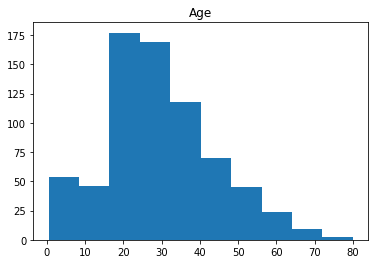

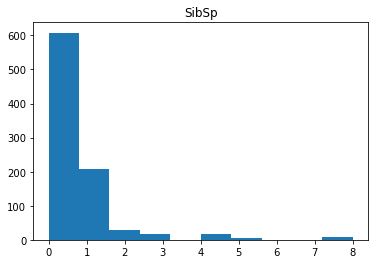

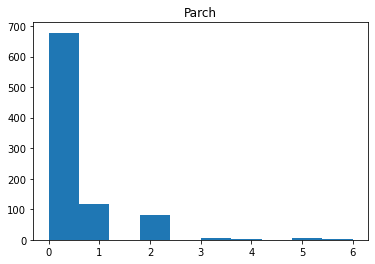

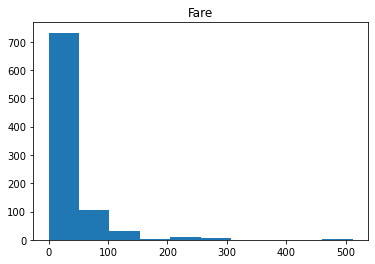

In [13]:
#數值性資料的分佈型態
for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


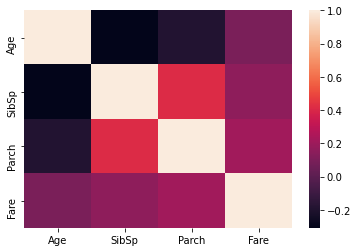

In [14]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [15]:
#用pivot_table比較 Age, SibSp, Parch, and Fare等變項在存活率上的情況
pd.pivot_table(training, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


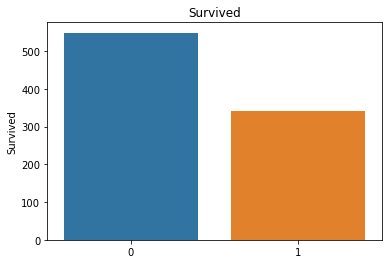

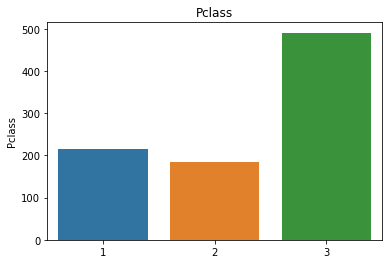

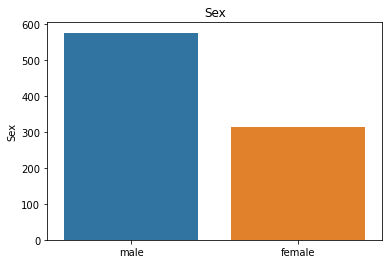

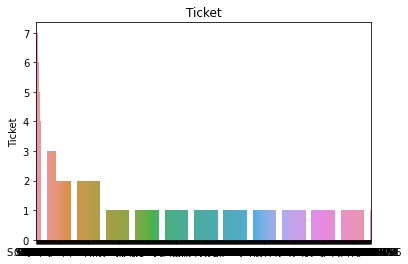

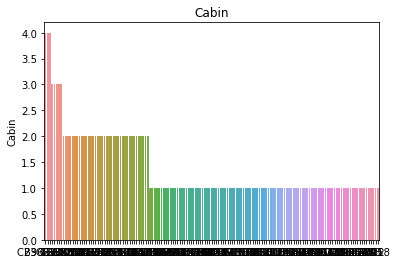

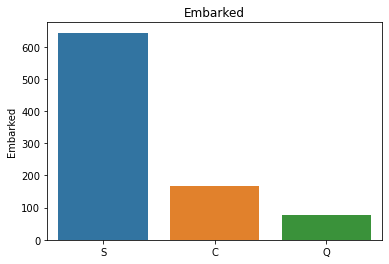

In [16]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [17]:
#看船票等級、性別跟登船地點在存活與否的差異
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


特徵工程

In [18]:
#1.Cabin:簡化船艙編號(評估編號的文字或數字是否影響生存?)
#2.Tickets:不同的船票是否會影響生存?
#3.名字是否影響生存?

In [19]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 把船艙編號區分為字母跟數字
# letters 字母
# multiple letters 數字的長度
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [20]:
pd.pivot_table(training, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [21]:
#creates categories based on the cabin letter (n stands for null)   把船票編號的字母，創造出個類別性columns
#in this case we will treat null values like it's own category      把遺漏值也當作一個類別
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [22]:
#comparing surivial rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Ticket', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [23]:
#understand ticket values better    了解票券的數值
#numeric vs non numeric             數值 VS 非數值
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [24]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [25]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
# pd.set_option() >> Sets the value of the specified option.
# "max_rows", None >> 每個row的最大值; 沒有限制多少個
pd.set_option("max_rows", None)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
pp             3
wep            3
sopp           3
scah           2
swpp           2
sotono2        2
ppp            2
casoton        1
sop            1
sc             1
as             1
fc             1
fa             1
scahbasle      1
scow           1
sca4           1
sp             1
Name: ticket_letters, dtype: int64

In [26]:
#數值性跟非數值性船票在生存率的差異
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [27]:
#船票上不同的文字在生存率的差異
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [28]:
#把人名用特徵工程
training.Name.head(50)
#.strip() >> 去除空格
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc

In [29]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Capt              1
Don               1
the Countess      1
Mme               1
Ms                1
Jonkheer          1
Sir               1
Lady              1
Name: name_title, dtype: int64

為了model，把Data做preprocessing

In [30]:
"""
1)把embarked的遺漏值刪掉
2)僅包含相關的變項，只留下：'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'
3)用pd.get_dummies作dummy coding
4)把票價("fare")跟年紀("age")，填入平均數
5)用log把票價("fare")做常態化，弄成常態分配
6)做0-1的標準化
"""

'\n1)把embarked的遺漏值刪掉\n2)僅包含相關的變項，只留下：\'Pclass\', \'Sex\',\'Age\', \'SibSp\', \'Parch\', \'Fare\', \'Embarked\', \'cabin_adv\', \'cabin_multiple\', \'numeric_ticket\', \'name_title\'\n3)用pd.get_dummies作dummy coding\n4)把票價("fare")跟年紀("age")，填入平均數\n5)用log把票價("fare")做常態化，弄成常態分配\n6)做0-1的標準化\n'

(889,)

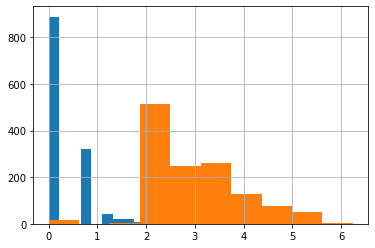

In [31]:
#把剛在training建立的類別資料，也在all_data建立一次
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#把連續性資料，做填補遺漏值
all_data.Age = all_data.Age.fillna(all_data.Age.mean())
all_data.Fare = all_data.Fare.fillna(all_data.Fare.mean())

#把'embarked'這columen裡的遺漏值給刪掉
all_data.dropna(subset=['Embarked'], inplace=True)

#用log法把'sibsp'做常態化
all_data['norm_sibsp'] = np.log(all_data.SibSp + 1)
all_data['norm_sibsp'].hist()

#用log法把'fare'做常態化
all_data['norm_fare'] = np.log(all_data.Fare + 1)
all_data['norm_fare'].hist()

#把'Pclass'轉換成string
all_data.Pclass = all_data.Pclass.astype(str)

#用dummy coding 建立dummy變項
all_dummies = pd.get_dummies(all_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple','numeric_ticket','name_title','train_test']])

#把dummy coding過後的資料，拆解成train跟test的資料集(就沒有用train_test_split())
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

In [32]:
#把資料做標準化
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test == 1].Survived

Model Building (Baseline Validation Performance)

In [33]:
"""
先把各個模型都用默認的參數，並設定5個fold來做交叉驗證來當成baseline。有著validation set作baseline，可以看tuning可以如何改善模型。在validation set有較高的baselin的模型不代表在最終的test set會更好。
Naive Bayes
Logistic Regression
Decision Tree
K Nearest Neighbor
Random Forest
Support Vector Classifier
Xtreme Gradient Boosting
Soft Voting Classifier - All Models
"""

'\n先把各個模型都用默認的參數，並設定5個fold來做交叉驗證來當成baseline。有著validation set作baseline，可以看tuning可以如何改善模型。在validation set有較高的baselin的模型不代表在最終的test set會更好。\nNaive Bayes\nLogistic Regression\nDecision Tree\nK Nearest Neighbor\nRandom Forest\nSupport Vector Classifier\nXtreme Gradient Boosting\nSoft Voting Classifier - All Models\n'

In [34]:
from sklearn.model_selection import cross_val_score 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression 
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 

In [35]:
#把Naive Bayes當作baseline在classification tasks
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [36]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [37]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [38]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75842697 0.82485876]
0.776207706468609


In [39]:
df = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75280899 0.74157303 0.80898876 0.75842697 0.82485876]
0.777331301974227


In [40]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80337079 0.80337079 0.81460674 0.83050847]
0.8043039421062655


In [41]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
0.8155652891512728


In [42]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.78651685 0.85393258 0.73033708 0.84180791]
0.8065638291119152


In [43]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.79775281 0.85393258 0.73033708 0.83615819]
0.8076810766203263


In [44]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.84831461 0.78651685 0.81920904]
0.8177743921792675


In [46]:
#Voting classifier採用所有input並把結果做平均。
#在"hard"的voting classifier每一個classifier都會得到1個 vote "yes" or "no" 並且結果是個 popular vote. For this, you generally want odd numbers
#在 "soft" classifier 會有每一個模型的 average confidence. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting='soft')
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.81460674 0.83146067 0.80898876 0.85875706]
0.8290547832158955


In [47]:
voting_clf.fit(X_train_scaled, y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

Model Tuned Performance

In [48]:
#在有了baseline之後，讓我們看看是否可以改善模型的結果。主要是用GridSearch來tune模型。也使用Randomized Search來用在Random Forest跟XG Boost來簡短測試的時間。

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best parameters: ' + str(classifier.best_params_))

In [51]:
lr = LogisticRegression()
param_grid = {'max_iter': [2000], 'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Logistic Regression
Best Score: 0.8268075922046594
Best parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.1s finished


In [52]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'p': [1,2]}
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8279184917158636
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    3.6s finished


In [53]:
svc = SVC(probability=True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10], 'C': [.1,1,10,100,1000]}, 
                                    {'kernel':['linear'], 'C':[.1,1,10,100,1000]}, 
                                    {'kernel': ['poly'], 'degree': [2,3,4,5], 'C': [.1,1,10,100,1000]}]
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8324319177299563
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
[Parallel(n_jobs=1)]: Done 275 out of 275 | elapsed:  5.6min finished


In [54]:
rf = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [100,500,1000], 'bootstrap': [True,False], 'max_depth':[3,5,10,20,50,75,100,None], 'max_features':['auto','sqrt'], 'min_samples_leaf': [1,2,4,10],
                'min_samples_split':[2,5,10]}
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=True, n_jobs=1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf_rnd, 'Random Forest')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8335555132355742
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.5min finished


In [55]:
rf = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators':[400,450,500,550], 'criterion':['gini', 'entropy'], 'bootstrap':[True], 'max_depth':[15,20,25], 'max_features':['auto','sqrt',10],
                 'min_samples_leaf':[2,3], 'min_samples_split':[2,3]}
clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
best_clf_rf = clf_rf_rnd.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf, 'Random Forest')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8335428172411603
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': True}
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.9min finished


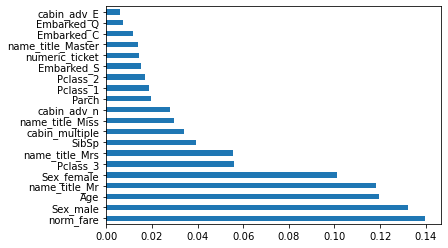

In [56]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [57]:
xgb = XGBClassifier(random_state=1)

param_grid = {'n_estimators':[450,500,550], 'colsample_bytree':[0.75,0.8,0.85], 'max_depth':[None], 'reg_alpha':[1], 'reg_lambda':[2,5,10], 'subsample':[0.55,0.6,0.65],                          'learning_rate':[0.5], 'gamma':[0.5,1,2], 'min_child_weight':[0.01], 'sampling_method':['uniform']}

clf_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb, 'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  6.7min finished
XGB
Best Score: 0.8515330413254618
Best parameters: {'colsample_bytree': 0.75, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.6}


In [58]:
y_hat_xgb = best_clf_xgb.best_estimators_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId':test.PassengerId, 'Survived':y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimators_'

Model Additional Ensemble Approaches

In [59]:
"""
1)a hard voting classifier帶有三個estimator(KNN, SVM, RF)
2)a soft voting classifier帶有三個estimator(KNN, SVM, RF)
3)a soft voting classifier以及所有表現超過80%的estimator，除了XGB(KNN, RF, LR, SVC)
4)a soft voting classifier以及所有estimator也包含XGB(KNN, SVM, RF, LR, XGB)
"""

'\n1)a hard voting classifier帶有三個estimator(KNN, SVM, RF)\n2)a soft voting classifier帶有三個estimator(KNN, SVM, RF)\n3)a soft voting classifier以及所有表現超過80%的estimator，除了XGB(KNN, RF, LR, SVC)\n4)a soft voting classifier以及所有estimator也包含XGB(KNN, SVM, RF, LR, XGB)\n'

In [63]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting='soft')
voting_clf_all = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('LR', best_lr), ('svc', best_svc)], voting='soft')
voting_clf_xgb = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('LR', best_lr), ('svc', best_svc), ('xgb', best_xgb)], voting='soft')

print('voting_clf_hard :', cross_val_score(voting_clf_hard, X_train, y_train, cv=5))
print('voting_clf_hard_mean : ', cross_val_score(voting_clf_hard, X_train, y_train, cv=5).mean())

print('voting_clf_soft : ', cross_val_score(voting_clf_soft, X_train, y_train, cv=5))
print('voting_clf_soft_mean : ', cross_val_score(voting_clf_soft, X_train, y_train, cv=5).mean())

print('voting_clf_all : ', cross_val_score(voting_clf_all, X_train, y_train, cv=5))
print('voting_clf_all_mean : ', cross_val_score(voting_clf_all, X_train, y_train, cv=5).mean())

print('voting_clf_xgb : ', cross_val_score(voting_clf_xgb, X_train, y_train, cv=5))
print('voting_clf_xgb_mean : ', cross_val_score(voting_clf_xgb, X_train, y_train, cv=5).mean())

voting_clf_hard : [0.79775281 0.82022472 0.8258427  0.80337079 0.83050847]
voting_clf_hard_mean :  0.8155398971624453
voting_clf_soft :  [0.78651685 0.8258427  0.8258427  0.80337079 0.85875706]
voting_clf_soft_mean :  0.8189424236653335
voting_clf_all :  [0.80898876 0.83146067 0.8258427  0.81460674 0.86440678]
voting_clf_all_mean :  0.8290611312131023
voting_clf_xgb :  [0.83146067 0.8258427  0.83146067 0.81460674 0.86440678]
voting_clf_xgb_mean :  0.8313083222243384


In [64]:
#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1], [1,2,1], [1,1,2], [2,1,1], [2,2,1], [1,2,2], [2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid=params, cv=5, verbose=True, n_jobs=-1)
best_clf_weight = vote_weight.fit(X_train_scaled, y_train)
clf_performance(best_clf_weight, 'VC weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.7s finished
VC weights
Best Score: 0.8324382657271631
Best parameters: {'weights': [2, 1, 1]}


In [65]:
#Make Predictions
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)

y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_vc_soft = voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [72]:
#convert output to dataframe
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {"PassengerId": test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft': y_hat_vc_soft, 'Survived_vc_all': y_hat_vc_all,
                    'Survived_vc_xgb': y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [73]:
#track differences between outputs
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis=1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis=1)

In [76]:
comparison.difference_hard_all.value_counts()

0    410
1      8
Name: difference_hard_all, dtype: int64

In [77]:
#prepare submission files
submission.to_csv('submission_rf.csv', index=False)
submission_2.to_csv('submission_vc_hard.csv', index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb2.csv', index=False)